In [1]:
import pandas as pd
import numpy as np

import sys

import pickle

from transformers import AutoConfig, AutoTokenizer, TFAutoModel
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

import metrics

from simpletransformers.language_representation import RepresentationModel

from TweetDataReport import datasplit, print_tweet_report, check_relevance_balance, datasplit_new

import time
import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from IPython.display import clear_output

import os
import re

from hyperopt import hp, fmin, tpe , pyll

In [2]:
print("Python Version:" + sys.version)
print("TensorFlow Version:", tf.__version__)
if tf.test.gpu_device_name():
    print("GPU is available")
else:
    print("GPU is NOT available")
print("CUDA Version:", tf.test.is_built_with_cuda())

Python Version:3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
TensorFlow Version: 2.10.0
GPU is available
CUDA Version: True


In [4]:
# file = 'data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl'

# with open(file, "rb") as file:
#     WF = pickle.load(file)

In [5]:
#print_tweet_report(WF)

,column_names,data_types,shape_len,unique_values
0,reps,<class 'numpy.ndarray'>,"(1, 768)",1892
1,relevance,<class 'numpy.int64'>,(),2


In [6]:
#check_relevance_balance(WF)

,relevance,count,balance
0,0,1258,66.49%
1,1,634,33.51%


## DATA REP PREPARATION (BERT-GPTdone/roberta didn't work due to the same error in every language)

In [4]:
language =  'italian'
#language =  'spanish'
#language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

#case = 'bert'
#case = 'roberta'
case = 'gpt2'

# reps_models = ["dbmdz/bert-base-italian-uncased","dbmdz/bert-base-italian-cased","dbmdz/bert-base-italian-xxl-cased","dbmdz/bert-base-italian-xxl-uncased"]
# reps_models = ['osiria/roberta-base-italian']
reps_models = ["GroNLP/gpt2-small-italian","GroNLP/gpt2-medium-italian-embeddings","GroNLP/gpt2-small-italian-embeddings"]

for combo in itertools.product(cleanings,reps_models):
    
    clear_output(wait=True)
    
    with open('data/'+ language +'/'+ combo[0] +'/data.pkl','rb') as file:
        WF = pickle.load(file)
    
    pretrained_model = RepresentationModel(model_type=case,model_name=combo[1],use_cuda=False) 
    sentence_vectors = pretrained_model.encode_sentences(WF['text'], combine_strategy="mean")
    sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
    pandasseries = pd.Series(sentence_vectors)
    WF['reps'] = pandasseries.copy()
    data = pd.DataFrame()
    data['reps'] = WF['reps'].copy()
    data['relevance'] = WF['relevance'].copy()
    
    link = 'data/'+ language +'/'+ combo[0] +'/feature_extractions/'+case+'/'+ str(combo[1]).replace('/', '_')+'.pkl'
    
    print(link)
    
    with open(link , 'wb') as file:
        pickle.dump(data, file)

Some weights of GPT2ForTextRepresentation were not initialized from the model checkpoint at GroNLP/gpt2-small-italian-embeddings and are newly initialized: ['transformer.gpt2.h.3.mlp.c_proj.bias', 'transformer.gpt2.h.2.mlp.c_proj.weight', 'transformer.gpt2.h.3.ln_1.bias', 'transformer.gpt2.h.5.ln_2.bias', 'transformer.gpt2.h.0.attn.c_attn.bias', 'transformer.gpt2.h.4.mlp.c_proj.weight', 'transformer.gpt2.h.2.mlp.c_proj.bias', 'transformer.gpt2.h.11.ln_2.bias', 'transformer.gpt2.h.10.attn.c_proj.bias', 'transformer.gpt2.h.11.ln_2.weight', 'transformer.gpt2.h.8.mlp.c_fc.weight', 'transformer.gpt2.ln_f.weight', 'transformer.gpt2.h.8.attn.c_attn.bias', 'transformer.gpt2.h.3.attn.c_attn.bias', 'transformer.gpt2.h.11.attn.c_proj.weight', 'transformer.gpt2.h.8.attn.c_proj.weight', 'transformer.gpt2.h.4.attn.c_attn.weight', 'transformer.gpt2.h.4.ln_2.bias', 'transformer.gpt2.h.7.attn.c_proj.weight', 'transformer.gpt2.h.9.ln_2.bias', 'transformer.gpt2.h.3.attn.c_attn.weight', 'transformer.gpt2.

data/italian/04-twisted_remover_with_emoticons/feature_extractions/gpt2/GroNLP_gpt2-small-italian-embeddings.pkl


In [4]:
#language =  'italian'
language =  'spanish'
#language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

#case = 'bert'
#case = 'roberta'
case = 'gpt2'

#reps_models = ["dccuchile/bert-base-spanish-wwm-uncased","dccuchile/bert-base-spanish-wwm-cased","Geotrend/bert-base-es-cased","dccuchile/tulio-chilean-spanish-bert","dccuchile/patana-chilean-spanish-bert"]
#reps_models = ["MMG/mlm-spanish-roberta-base","llange/xlm-roberta-large-spanish"]
reps_models = ["DeepESP/gpt2-spanish","datificate/gpt2-small-spanish","mrm8488/spanish-gpt2","DeepESP/gpt2-spanish-medium"]

for combo in itertools.product(cleanings,reps_models):
    
    clear_output(wait=True)
    
    with open('data/'+ language +'/'+ combo[0] +'/data.pkl','rb') as file:
        WF = pickle.load(file)
    
    pretrained_model = RepresentationModel(model_type=case,model_name=combo[1],use_cuda=False) 
    sentence_vectors = pretrained_model.encode_sentences(WF['text'], combine_strategy="mean")
    sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
    pandasseries = pd.Series(sentence_vectors)
    WF['reps'] = pandasseries.copy()
    data = pd.DataFrame()
    data['reps'] = WF['reps'].copy()
    data['relevance'] = WF['relevance'].copy()

    link = 'data/'+ language +'/'+ combo[0] +'/feature_extractions/'+case+'/'+ str(combo[1]).replace('/', '_')+'.pkl'
    
    print(link)
    
    with open(link , 'wb') as file:
        pickle.dump(data, file)

Some weights of GPT2ForTextRepresentation were not initialized from the model checkpoint at DeepESP/gpt2-spanish-medium and are newly initialized: ['transformer.gpt2.h.23.ln_2.weight', 'transformer.gpt2.h.19.attn.c_proj.bias', 'transformer.gpt2.h.3.mlp.c_fc.bias', 'transformer.gpt2.wpe.weight', 'transformer.gpt2.h.0.attn.c_attn.weight', 'transformer.gpt2.h.9.mlp.c_proj.bias', 'transformer.gpt2.h.13.attn.c_proj.weight', 'transformer.gpt2.wte.weight', 'transformer.gpt2.h.7.mlp.c_proj.weight', 'transformer.gpt2.h.18.attn.c_proj.weight', 'transformer.gpt2.h.2.ln_2.bias', 'transformer.gpt2.h.2.attn.c_proj.weight', 'transformer.gpt2.h.17.attn.c_proj.weight', 'transformer.gpt2.h.23.ln_1.bias', 'transformer.gpt2.h.6.attn.c_proj.weight', 'transformer.gpt2.h.7.mlp.c_fc.weight', 'transformer.gpt2.h.18.attn.c_attn.bias', 'transformer.gpt2.h.12.attn.c_attn.weight', 'transformer.gpt2.h.10.mlp.c_proj.bias', 'transformer.gpt2.h.12.mlp.c_proj.weight', 'transformer.gpt2.h.18.attn.c_proj.bias', 'transfor

data/spanish/04-twisted_remover_with_emoticons/feature_extractions/gpt2/DeepESP_gpt2-spanish-medium.pkl


In [9]:
#language =  'italian'
#language =  'spanish'
language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

#model_type = 'bert'
#case = 'roberta'
model_type = 'gpt2'

#reps_models = ["Geotrend/bert-base-el-cased","nlpaueb/bert-base-greek-uncased-v1","dimitriz/st-greek-media-bert-base-uncased","petros/bert-base-cypriot-uncased-v1"]
reps_models = ["lighteternal/gpt2-finetuned-greek-small","lighteternal/gpt2-finetuned-greek","nikokons/gpt2-greek","ClassCat/gpt2-small-greek-v2"]

for combo in itertools.product(cleanings,reps_models):
    
    clear_output(wait=True)
    
    with open('data/'+ language +'/'+ combo[0] +'/data.pkl','rb') as file:
        WF = pickle.load(file)
    
    pretrained_model = RepresentationModel(model_type=model_type,model_name=combo[1],use_cuda=False) 
    sentence_vectors = pretrained_model.encode_sentences(WF['text'], combine_strategy="mean")
    sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
    pandasseries = pd.Series(sentence_vectors)
    WF['reps'] = pandasseries.copy()
    data = pd.DataFrame()
    data['reps'] = WF['reps'].copy()
    data['relevance'] = WF['relevance'].copy()
    
    link = 'data/'+ language +'/'+ combo[0] +'/feature_extractions/'+model_type+'/'+ str(combo[1]).replace('/', '_')+'.pkl'
    
    print(link)
    
    with open(link , 'wb') as file:
        pickle.dump(data, file)

Some weights of GPT2ForTextRepresentation were not initialized from the model checkpoint at ClassCat/gpt2-small-greek-v2 and are newly initialized: ['transformer.gpt2.h.3.mlp.c_fc.bias', 'transformer.gpt2.wpe.weight', 'transformer.gpt2.h.0.attn.c_attn.weight', 'transformer.gpt2.wte.weight', 'transformer.gpt2.h.7.mlp.c_proj.weight', 'transformer.gpt2.h.2.ln_2.bias', 'transformer.gpt2.h.2.attn.c_proj.weight', 'transformer.gpt2.h.6.attn.c_proj.weight', 'transformer.gpt2.h.7.mlp.c_fc.weight', 'transformer.gpt2.h.5.attn.c_proj.bias', 'transformer.gpt2.h.0.attn.c_proj.bias', 'transformer.gpt2.h.7.ln_1.bias', 'transformer.gpt2.h.7.ln_2.bias', 'transformer.gpt2.h.2.ln_1.bias', 'transformer.gpt2.h.0.mlp.c_proj.bias', 'transformer.gpt2.h.0.ln_1.bias', 'transformer.gpt2.h.4.ln_1.weight', 'transformer.gpt2.h.0.ln_1.weight', 'transformer.gpt2.h.1.attn.c_attn.weight', 'transformer.gpt2.h.6.mlp.c_proj.weight', 'transformer.gpt2.h.2.attn.c_proj.bias', 'transformer.gpt2.h.3.attn.c_proj.weight', 'transf

data/greek/04-twisted_remover_with_emoticons/feature_extractions/gpt2/ClassCat_gpt2-small-greek-v2.pkl


## POST PROCESSING HYPER TUNING

In [7]:
# I just change the combinations of language and model_type

language =  'italian'
#language =  'spanish'
#language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

model_type = 'bert'
# ase = 'roberta' didn't manage to get representations yet
#case = 'gpt-2' probably the code needs reformation

for cleaning in cleanings:
    path = 'data/'+ language +'/'+ cleaning + '/feature_extractions/' + model_type
    for x in os.listdir(path):
        file = path + '/' + x
        print(file)

data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl
data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-uncased.pkl
data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-xxl-cased.pkl
data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-xxl-uncased.pkl
data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl
data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-uncased.pkl
data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-xxl-cased.pkl
data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-xxl-uncased.pkl
data/italian/02-basic_remover_without_stopwords/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl
data/italian/02-basic_remover_without_stopwords/feature_extractions/bert/dbmdz_bert-base-italian-uncased.pkl
data/italian/02-basic_remover_without_stopwords/

In [17]:
file = 'data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl'

with open(file, "rb") as file:
    WF = pickle.load(file)
WF

,reps,relevance
0,"[[-0.16349472, -0.022513028, 0.1601058, 0.3005...",1
1,"[[-0.1870734, -0.1289106, 0.36564282, 0.020390...",0
2,"[[-0.058511183, -0.09192906, -0.24975105, 0.45...",1
3,"[[-0.07063484, -0.08345323, 0.18612616, 0.2530...",1
4,"[[-0.09547403, 0.21283852, 0.012412298, 0.3508...",1
...,...,...
1887,"[[-0.030228468, -0.14970928, 0.20723383, 0.424...",0
1888,"[[-0.115419574, 0.18743767, 0.23865303, 0.2736...",1
1889,"[[-0.042768005, 0.074689046, 0.05405128, 0.196...",1
1890,"[[-0.09403053, -0.04718489, 0.18331964, 0.4239...",0


In [9]:
print_tweet_report(WF)

,column_names,data_types,shape_len,unique_values
0,reps,<class 'numpy.ndarray'>,"(1, 768)",1892
1,relevance,<class 'numpy.int64'>,(),2


In [10]:
check_relevance_balance(WF)

,relevance,count,balance
0,0,1258,66.49%
1,1,634,33.51%


In [40]:
hyperspace = {
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'dropout_rate2': hp.uniform('dropout_rate2', 0.1, 0.5),
    'dropout_rate3': hp.uniform('dropout_rate3', 0.1, 0.5),
    'dropout_rate4': hp.uniform('dropout_rate4', 0.1, 0.5),
    'dropout_rate5': hp.uniform('dropout_rate6', 0.1, 0.5),
    'relovir': hp.uniform('relovir', 0.1, 0.5),
    'PostEmbedding#nods': hp.quniform('PostEmbedding#nods', 1 , 768, q=1),
    'batch_size' : hp.quniform('batch_size',20,140,q=5),
    'PostEmbedding#nods2': hp.quniform('PostEmbedding#nods2', 1 , 768, q=1),
    'PostEmbedding#nods3': hp.quniform('PostEmbedding#nods3', 1 , 768, q=1),
    'PostEmbedding#nods4': hp.quniform('PostEmbedding#nods4', 1 , 768, q=1),
    'PostEmbedding#nods5': hp.quniform('PostEmbedding#nods5', 1 , 768, q=1),
    'PrePredictionActivation':hp.choice('PrePredictionActivation',['softmax','sigmoid'])
     }

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
        
def datasplit_new(df,testsize,relovir):
    """
    Firstly we split the dataset into train and test parts.
    
    Then we create the training dataset by picking up the irrelevant tweets from the training 
    split part with only the number of relevant tweet
    
    The relovir variable represents the relative ratio of irrelevant(we usually have more irrelevant so) 
    over relevant number of training examples in the set.
    
    Returns as a (examples,768) np array the representations and the y as (examples,) shaped np array.
    
    Future: we need to be able to reduce zero and one examples accordinglydepending of which 
    
    """
    # make a copied instance of the dataset
    df = df.copy()
    # we split the dataset into train and test subsets
    df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df['reps'], df['relevance'], test_size = testsize)
    # reconstruct training set
    if relovir>0:
        training_set = pd.DataFrame()
        training_set['reps'] = df_X_train.copy()
        training_set['relevance'] = df_y_train.copy()
        training_set.reset_index(drop = True)
        # we split the training dataset by relervance into two DataFrames irr and rel
        grouping = training_set.groupby('relevance')
        group_dict = {}
        for name, group in grouping:
            group_dict[str(name)] = group
        # we find the absolute numbers 
        df_training_irr = group_dict['0'].reset_index(drop = True)
        df_training_rel = group_dict['1'].reset_index(drop = True)
        # based on the relovir parameter pick up the set with the appropriate ratio, here an explanation for the inner if is needed:
        Nrel = len(df_training_rel)
        # print(Nrel)
        Nirr = len(df_training_irr)
        # print(Nirr)
        N = Nrel + Nirr
        if relovir<=1:
            if relovir<Nrel/Nirr:
                relevant_part = df_training_rel.sample(n = int(Nirr*relovir))
                df_training = pd.concat([df_training_irr, relevant_part]).sample(frac=1).reset_index(drop = True)
            else:
                df_training = pd.concat([df_training_irr, df_training_rel]).sample(frac=1).reset_index(drop = True)
        else:
            if relovir<Nrel/Nirr:
                irrelevant_part = df_training_irr.sample(n = int((1/relovir)*Nrel))
                df_training = pd.concat([df_training_rel, irrelevant_part]).sample(frac=1).reset_index(drop = True)
            else:
                df_training = pd.concat([df_training_irr, df_training_rel]).sample(frac=1).reset_index(drop = True)
        df_X_train = df_training['reps'].copy()
        df_y_train = df_training['relevance'].copy()
    else:
        print("relovir can't be negative or zero")
    df_X_train.apply(lambda x: x.reshape(768,))
    df_X_test = df_X_test.copy().apply(lambda x: x.reshape(768,))
    training_set_X = np.vstack(df_X_train)
    test_set_X = np.vstack(df_X_test)
    y_train = np.vstack(df_y_train).reshape(-1)
    y_test = np.vstack(df_y_test).reshape(-1)
    return training_set_X, test_set_X, y_train, y_test

training_set_X, test_set_X, training_set_y, test_set_y = datasplit_new(WF,0.3,relovir = 0.4)
print(f"Το training set X: {type(training_set_X)} με {training_set_X.shape}")
print(f"To test set X: {type(test_set_X)} με {test_set_X.shape}")
print(f"To training set y: {type(training_set_y)} με {training_set_y.shape}")
print(f"To test set y: {type(test_set_y )} με {test_set_y.shape}")

Το training set X: <class 'numpy.ndarray'> με (1222, 768)
To test set X: <class 'numpy.ndarray'> με (568, 768)
To training set y: <class 'numpy.ndarray'> με (1222,)
To test set y: <class 'numpy.ndarray'> με (568,)


In [53]:
def modelize(calibrers):  
    
    hyperparameters = {
                   'ITERATIONS':'15',
                   'EPOCHS': '50',
                   'LOSS':"'binary_crossentropy'",
                   'OPTIMIZER': 'Adam(learning_rate=0.0001)',
                   'METRICS': """['acc', metrics.precision, metrics.recall, metrics.f1]""",
                   'BATCH_SIZE': """calibrers['batch_size']""",
                   'TEST_SIZE': '0.3',
                   'RELOVIR': """calibrers['relovir']"""}
    
    for key, value in hyperparameters.items():
        globals()[key] = eval(value)
    
    av_loss_train = np.zeros(EPOCHS)
    av_loss_val = np.zeros(EPOCHS)
    av_acc_train = np.zeros(EPOCHS)
    av_acc_val = np.zeros(EPOCHS)
    av_prec_train = np.zeros(EPOCHS)
    av_prec_val = np.zeros(EPOCHS)
    av_rec_train = np.zeros(EPOCHS)
    av_rec_val = np.zeros(EPOCHS)
    av_f1_train = np.zeros(EPOCHS)
    av_f1_val = np.zeros(EPOCHS)
    
    iter_time = 0
    
    for iteration in range(ITERATIONS):
        start_time = time.time()

        training_set_X, test_set_X, training_set_y, test_set_y = datasplit_new(WF,0.3,relovir = RELOVIR)
        
        model = None
    
        #np.random.seed(SEED)
    
        #initializer choice
    
        model = Sequential()
        
        model.add(Input(shape = (768,)))
        
        model.add(Dense(calibrers['PostEmbedding#nods'],activation='relu'))
        model.add(Dropout(calibrers['dropout_rate']))
        
        model.add(Dense(calibrers['PostEmbedding#nods2'],activation='relu'))
        model.add(Dropout(calibrers['dropout_rate2']))
        
        model.add(Dense(calibrers['PostEmbedding#nods3'],activation='relu'))
        model.add(Dropout(calibrers['dropout_rate3']))
        
        model.add(Dense(calibrers['PostEmbedding#nods4'],activation='relu'))
        model.add(Dropout(calibrers['dropout_rate4']))
        
        model.add(Dense(calibrers['PostEmbedding#nods5'],activation='relu'))
        model.add(Dropout(calibrers['dropout_rate5']))     
        
        model.add(Dense(1,activation = calibrers['PrePredictionActivation']))
        
        model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)
    
        #print(type(model.summary()))
              
        clear_output(wait=True)
        print(f'iteration {iteration-1} took {iter_time} s or {iter_time/60} min')
    
        history = model.fit(training_set_X, training_set_y,validation_data=( test_set_X,  test_set_y), batch_size = int(BATCH_SIZE), epochs = EPOCHS, verbose = 0,callbacks=[],shuffle = True)
    
    
        #training metrics
        av_loss_train = np.add(av_loss_train,np.array(history.history['loss']))
        av_acc_train = np.add(av_acc_train,np.array(history.history['acc']))
        av_prec_train = np.add(av_prec_train,np.array(history.history['precision']))
        av_rec_train = np.add(av_rec_train,np.array(history.history['recall']))
        av_f1_train = np.add(av_f1_train,np.array(history.history['f1']))
        #validation metrics
        av_loss_val = np.add(av_loss_val,np.array(history.history['val_loss']))
        av_acc_val = np.add(av_acc_val,np.array(history.history['val_acc']))
        av_prec_val = np.add(av_prec_val,np.array(history.history['val_precision']))
        av_rec_val = np.add(av_rec_val,np.array(history.history['val_recall']))
        av_f1_val = np.add(av_f1_val,np.array(history.history['val_f1']))
    
        end_time = time.time()
    
        iter_time = end_time-start_time
    
    av_loss_train = np.divide(av_loss_train,ITERATIONS)
    av_acc_train = np.divide(av_acc_train,ITERATIONS)
    av_prec_train = np.divide(av_prec_train,ITERATIONS)
    av_rec_train = np.divide(av_rec_train,ITERATIONS)
    av_f1_train = np.divide(av_f1_train,ITERATIONS)

    av_loss_val = np.divide(av_loss_val,ITERATIONS)
    av_acc_val = np.divide(av_acc_val,ITERATIONS)
    av_prec_val = np.divide(av_prec_val,ITERATIONS)
    av_rec_val = np.divide(av_rec_val,ITERATIONS)
    av_f1_val = np.divide(av_f1_val,ITERATIONS)
    
    clear_output(wait=True)

    results = pd.DataFrame({'train_loss': av_loss_train,'train_acc': av_acc_train,'train_prec': av_prec_train,'train_rec': av_rec_train,'train_f1': av_f1_train,'val_loss': av_loss_val,'val_acc': av_acc_val,'val_prec': av_prec_val,'val_rec': av_rec_val,'val_f1': av_f1_val})
    
    path = "runs"
    dirs = os.listdir(path)
    dirs.sort(reverse = True)
    the_run = dirs[0]
    match = re.search(r"run\d{5}", the_run)[0][3:]
    match = f'{(int(match)+1):05}'
    the_folder = f"run{match}"
    directory = os.path.join(path, the_folder)
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Directory {the_folder} created!")
    else:
        print("Directory already exists.")
    
    #####################
    # now save the results pickle and the hyperparameter text in the correct run folder
    filepath = f"runs" +f"/{the_folder}"
    sub_dir1 = os.path.join(filepath,'results.plk')
    sub_dir2 = os.path.join(filepath,"hyperparameters.txt")
    with open(sub_dir1, 'wb') as dummy:
        pickle.dump(results, dummy)
        
    hyperparameters = {
                   'ITERATIONS':'5',
                   'EPOCHS': '50',
                   'LOSS':"'binary_crossentropy'",
                   'OPTIMIZER': 'Adam(learning_rate=0.0001)',
                   'METRICS': """['acc', metrics.precision, metrics.recall, metrics.f1]""",
                   'BATCH_SIZE': BATCH_SIZE,
                   'TEST_SIZE': '0.3',
                   'RELOVIR': RELOVIR }
    
    
    with open(sub_dir2, 'w') as file:
        for key in hyperparameters:
            file.write('\n '+ key + ':' + str(hyperparameters[key]) + '\n')
            
    # txt with the n maximum val_f1 epochs and their values
    n=10
    if EPOCHS<n:
        n = 1
    sub_dir3 = os.path.join(filepath,"val_f1.txt")
    x = list(results['val_f1'].nlargest(n).index)
    print(x)
    nums = list(map(lambda x: round(results['val_f1'].loc[x],4),x))
    print(nums)
    text = 'epoch value\n'
    for i in range(n):
        text+=f'-{(x[i]):03}- {nums[i]}\n'
    with open(sub_dir3, 'wb') as dummy:
        dummy.write(text.encode())
        
    #####################
    # now save the plot pictures(not particularly usefull in the general code)
    plt.plot(results['val_acc'])
    plt.plot(results['val_prec'])
    plt.plot(results['val_rec'])
    plt.plot(results['val_f1'])
    plt.title('Average Evaluation Model Metrics')
    plt.ylabel('Value')
    plt.xlabel('Epoch')
    plt.legend(['accuracy','precision','recall','f1-score'], loc='lower right')#, bbox_to_anchor=(1, 0.5))
    plt.savefig(f'runs/{the_folder}/AEMM.jpg',dpi = 300)
    plt.show()
    
    ######################
    # save model summary
    with open(f'runs/{the_folder}/model_summary.txt', 'w') as f:
        model.summary(print_fn=lambda x: f.write(x + '\n'))

    print(results)
    
    av_f1_val = np.add(av_f1_val,np.array(history.history['val_f1']))
 
    return -np.max(np.divide(av_f1_val,ITERATIONS))

Directory run00009 created!                                                       
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]                                                    
[0.4997, 0.4997, 0.4997, 0.4997, 0.4997, 0.4997, 0.4997, 0.4997, 0.4997, 0.4997]  
 80%|████████  | 4/5 [09:52<02:04, 124.55s/trial, best loss: -0.11442983706792195]

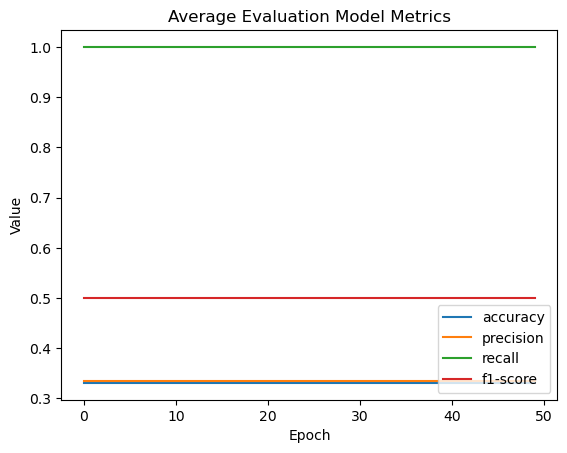

    train_loss  train_acc  train_prec  train_rec  train_f1  val_loss  \           
0     0.618957   0.331344    0.330348   1.000000  0.494702  0.489211   
1     0.450723   0.331344    0.329399   0.989744  0.492411  0.349541   
2     0.354615   0.331344    0.329331   0.994872  0.493583  0.308190   
3     0.306957   0.331344    0.327255   0.984615  0.489409  0.286445   
4     0.273086   0.331344    0.329413   0.994872  0.493359  0.270294   
5     0.249902   0.331344    0.332911   1.000000  0.497464  0.258026   
6     0.223827   0.331344    0.334373   1.000000  0.499230  0.246968   
7     0.210521   0.331344    0.332005   0.994872  0.495982  0.244046   
8     0.192894   0.331344    0.330764   0.989744  0.493190  0.248776   
9     0.181653   0.331344    0.328218   0.994872  0.491623  0.248259   
10    0.168840   0.331344    0.326904   0.989744  0.489530  0.260659   
11    0.162340   0.331344    0.331685   1.000000  0.496223  0.249550   
12    0.156649   0.331344    0.324461   0.979487  0.4

In [54]:
best = fmin(fn=modelize, space=hyperspace, algo=tpe.suggest, max_evals=5)

## comparison

In [59]:
def print_directory_structure(root_directory):
    for dirpath, dirnames, filenames in os.walk(root_directory):
        level = dirpath.replace(root_directory, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(dirpath)))
        sub_indent = ' ' * 4 * (level + 1)
        for f in filenames:
            print('{}{}'.format(sub_indent, f))
root_directory = 'runs'
print_directory_structure(root_directory)

runs/
    run00000/
    run00001/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
        val_f1.txt
    run00002/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
        val_f1.txt
    run00003/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
        val_f1.txt
    run00004/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
        val_f1.txt
    run00005/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
        val_f1.txt
    run00006/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
        val_f1.txt
    run00007/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
        val_f1.txt
    run00008/
        AEMM.jpg
        hyperparameters.txt
        model_summary.txt
        results.plk
       

In [68]:
maxlist = []
runlist = []
for run in os.listdir('runs')[1:]:
    folderpath = 'runs/'+run
    hyperparameters = None
    results = None
    with open(folderpath+'/results.plk', 'rb') as file:
        results = pickle.load(file)
    results = results.sort_values(by='val_f1',ascending = False)
    maxlist.append(results['val_f1'][0])
    runlist.append(run)

In [69]:
comparison = pd.DataFrame({'run':runlist,'f1':maxlist})

In [70]:
comparison = comparison.sort_values(by = 'f1',ascending=False)

In [71]:
comparison

,run,f1
2,run00003,0.502471
3,run00004,0.499873
8,run00009,0.499749
0,run00001,0.492204
1,run00002,0.490110
4,run00005,0.000000
5,run00006,0.000000
6,run00007,0.000000
7,run00008,0.000000
